# Summary of experiments

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, time, pickle

sys.path.insert(1, '../../src/')
from aux import *

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams["figure.figsize"]=15,7.5
plt.rcParams.update({'font.size': 40})
fig_path='fig/'
fig_path='../../../discrete-ergodic-flows-tex/fig/'

In [92]:
########################
########################
#     load results    #
########################
########################

# mad mix
madmix_elbos=pkl_load('results/madmix_elbos_toydiscrete')
madmix_elbos=np.hstack((madmix_elbos,pkl_load('results/madmix_elbos_ising')))
madmix_elbos=madmix_elbos[-madmix_elbos<np.inf]

madmix_cput=pkl_load('results/madmix_cput_toydiscrete')
madmix_cput=np.hstack((madmix_cput,pkl_load('results/madmix_cput_ising')))


# gibbs
gibbs_elbos=pkl_load('results/gibbs_elbos_toydiscrete')
gibbs_elbos=np.hstack((gibbs_elbos,pkl_load('results/gibbs_elbos_ising')))
gibbs_elbos=gibbs_elbos[-gibbs_elbos<np.inf]

gibbs_cput=pkl_load('results/gibbs_cput_toydiscrete')
gibbs_cput=np.hstack((gibbs_cput,pkl_load('results/gibbs_cput_ising')))


# concrete
concrete_elbos=pkl_load('results/concrete_elbos_toydiscrete')
concrete_elbos=np.vstack((concrete_elbos,pkl_load('results/concrete_elbos_ising')[np.newaxis,:]))
#concrete_elbos=concrete_elbos[-concrete_elbos<np.inf]

concrete_cput=pkl_load('results/concrete_cput_toydiscrete')
concrete_cput=np.vstack((concrete_cput,pkl_load('results/concrete_cput_ising')[np.newaxis,:]))
#concrete_cput=concrete_cput[concrete_cput>0]

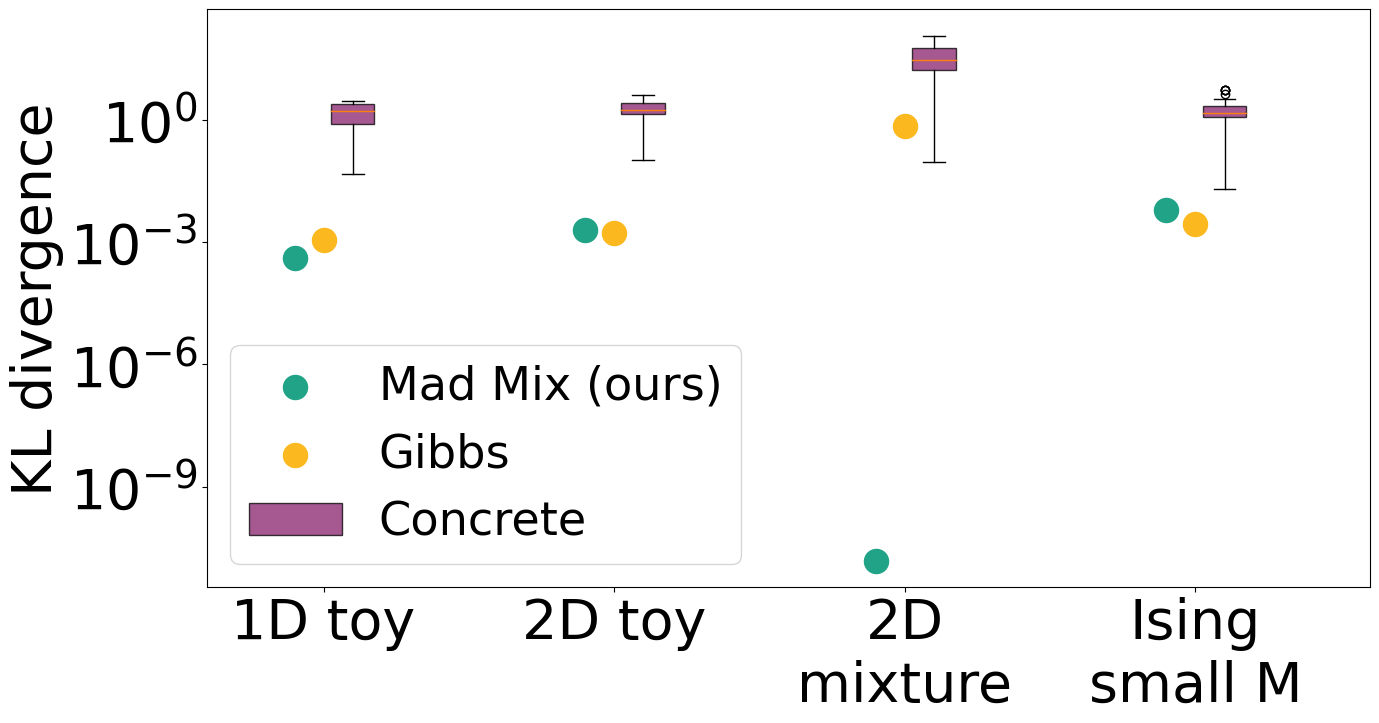

In [102]:
########################
########################
#      elbos plot      #
########################
########################
offset=0.1
marker_size=300

# first toy discrete example
plt.scatter([0-offset],[-madmix_elbos[0]],s=marker_size,c='#20A386FF',label='Mad Mix (ours)')
plt.scatter([0],[-gibbs_elbos[0]],s=marker_size,c='#FBB91FFF',label='Gibbs')
conc_tmp=np.copy(concrete_elbos[0,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp0=plt.boxplot(-conc_tmp,positions=[0+offset], patch_artist=True)

# second toy discrete example
plt.scatter([1-offset],[-madmix_elbos[1]],s=marker_size,c='#20A386FF')
plt.scatter([1],[-gibbs_elbos[1]],s=marker_size,c='#FBB91FFF')
conc_tmp=np.copy(concrete_elbos[1,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp1=plt.boxplot(-conc_tmp,positions=[1+offset], patch_artist=True)

# third toy discrete example
plt.scatter([2-offset],[-madmix_elbos[2]],s=marker_size,c='#20A386FF')
plt.scatter([2],[-gibbs_elbos[2]],s=marker_size,c='#FBB91FFF')
conc_tmp=np.copy(concrete_elbos[2,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp2=plt.boxplot(-conc_tmp,positions=[2+offset], patch_artist=True)

# small M ising model
plt.scatter([3-offset],[-madmix_elbos[3]],s=marker_size,c='#20A386FF')
plt.scatter([3],[-gibbs_elbos[3]],s=marker_size,c='#FBB91FFF')
conc_tmp=np.copy(concrete_elbos[3,:])
conc_tmp=conc_tmp[-conc_tmp<np.inf]
bp3=plt.boxplot(-conc_tmp,positions=[3+offset], patch_artist=True)

# fill concrete boxplots with colors
colors = ['#87216BFF', '#87216BFF', '#87216BFF','#87216BFF']
i=0
for bplot in (bp0,bp1,bp2,bp3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1

plt.ylabel('KL divergence')
plt.yscale('log')
plt.legend(fontsize='small',frameon=True,loc='lower left')
#plt.ylim(top=1000)
plt.xticks(ticks=[0,1,2,3],labels=['1D toy', '2D toy', '2D\nmixture', 'Ising\nsmall M']);
plt.savefig(fig_path+'summary_elbos.pdf', dpi=300, bbox_inches='tight')

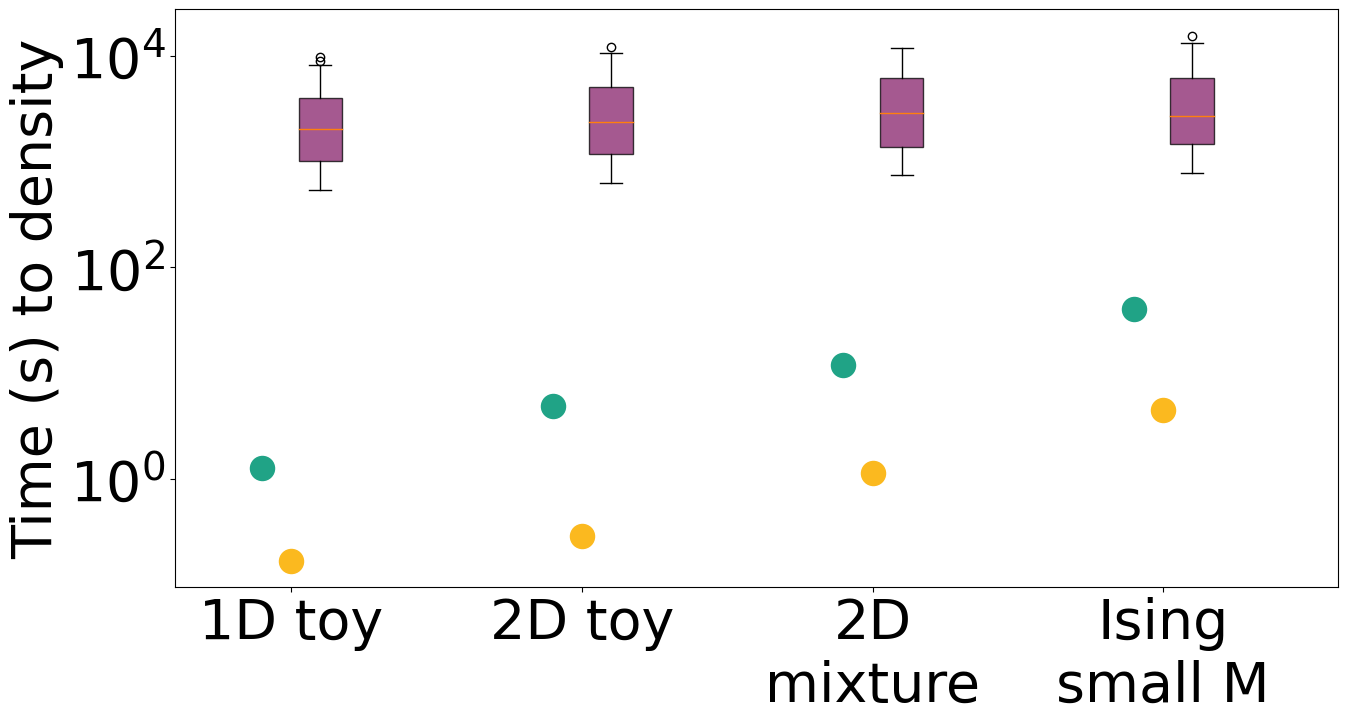

In [103]:
########################
########################
#    cpu times plot    #
########################
########################
offset=0.1
marker_size=300

# first toy discrete example
plt.scatter([0-offset],[madmix_cput[0]],s=marker_size,c='#20A386FF',label='Mad Mix (ours)')
plt.scatter([0],[gibbs_cput[0]],s=marker_size,c='#FBB91FFF',label='Gibbs')
conc_tmp=np.copy(concrete_cput[0,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp0=plt.boxplot(conc_tmp,positions=[0+offset], patch_artist=True)

# second toy discrete example
plt.scatter([1-offset],[madmix_cput[1]],s=marker_size,c='#20A386FF')
plt.scatter([1],[gibbs_cput[1]],s=marker_size,c='#FBB91FFF')
conc_tmp=np.copy(concrete_cput[1,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp1=plt.boxplot(conc_tmp,positions=[1+offset], patch_artist=True)

# third toy discrete example
plt.scatter([2-offset],[madmix_cput[2]],s=marker_size,c='#20A386FF')
plt.scatter([2],[gibbs_cput[2]],s=marker_size,c='#FBB91FFF')
conc_tmp=np.copy(concrete_cput[2,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp2=plt.boxplot(conc_tmp,positions=[2+offset], patch_artist=True)

# small M ising model
plt.scatter([3-offset],[madmix_cput[3]],s=marker_size,c='#20A386FF')
plt.scatter([3],[gibbs_cput[3]],s=marker_size,c='#FBB91FFF')
conc_tmp=np.copy(concrete_cput[3,:])
conc_tmp=conc_tmp[conc_tmp>0]
bp3=plt.boxplot(conc_tmp,positions=[3+offset], patch_artist=True)

# fill concrete boxplots with colors
colors = ['#87216BFF', '#87216BFF', '#87216BFF','#87216BFF']
i=0
for bplot in (bp0,bp1,bp2,bp3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.75)
        if i==0: patch.set_label('Concrete')
        i=i+1

plt.ylabel('Time (s) to density')
plt.yscale('log')
#plt.legend(fontsize='x-small',frameon=True,loc='lower left')
#plt.ylim(top=1000)
plt.xticks(ticks=[0,1,2,3],labels=['1D toy', '2D toy', '2D\nmixture', 'Ising\nsmall M']);
plt.savefig(fig_path+'summary_cput.pdf', dpi=300, bbox_inches='tight')